# Vivek's blog

#### Note to reader:

This is an archive of algorithms that I have imlemented. I have tried to do it in the style of an instructional blog to facilitate code readability in the future for myself. I will be greatful if you find and report bugs. Suggestions about improving implementations are always welcome. Feel free to reuse my code in any form or manner you deem fit.

## Implementing gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import urllib2
import math
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# downloading data 
dataFile = urllib2.urlopen("http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr06.xls")
parsedData = pd.ExcelFile(dataFile)
data = parsedData.parse
xPoints = np.round(np.array(data().X),2)
tmp = list(xPoints)
tmp = [[_,np.random.random()*_] for _ in xPoints]
xPoints = tmp
yPoints = np.round(np.array(data().Y),2)
print("-"*100)
print"xPoints: ", xPoints
print("-"*100)
print"yPoints: ",yPoints
print("-"*100)
print"Combined coordinates: ",[_ for _ in zip(xPoints,yPoints)]

*** No CODEPAGE record, no encoding_override: will use 'ascii'
----------------------------------------------------------------------------------------------------
xPoints:  [[108, 50.40336704032592], [19, 13.827458040158415], [13, 2.08344191959546], [124, 60.27845123113404], [40, 4.8996926488755665], [57, 37.13581214966093], [23, 0.8944623427241285], [14, 1.925012562910786], [45, 30.625724825484834], [10, 3.7157542526472365], [5, 0.5801038694270977], [48, 21.707094078192053], [11, 0.4010362470045169], [23, 0.5321899717651752], [7, 1.075371334282086], [2, 0.08412134776025337], [24, 1.168905724265139], [6, 0.6406650774584448], [3, 1.194888697210878], [23, 11.583494784881083], [6, 4.610272542454685], [9, 6.835426291219185], [9, 5.526779269975881], [3, 2.5342252871445226], [29, 22.04443388666395], [7, 0.6509362851627296], [4, 3.8395982590898186], [20, 3.138983697503841], [7, 6.077583568712467], [4, 0.8197857421186479], [0, 0.0], [25, 19.203422793913425], [6, 1.6673214908508591], [5, 0.921

##### Plotting X vs Y in every dimension of X

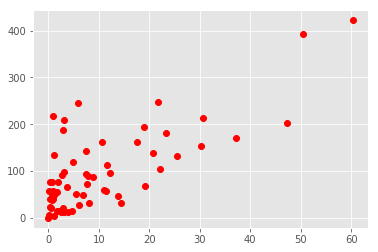

In [4]:
plt.plot([x[1] for x in xPoints],yPoints,'ro')

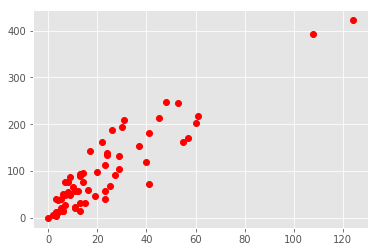

In [5]:
plt.plot([x[0] for x in xPoints],yPoints,'ro')


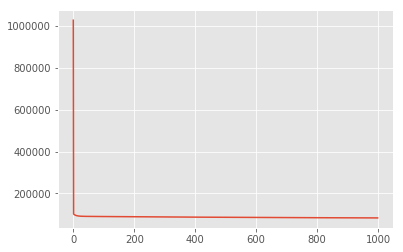

In [6]:
# initialize everything formally
y = np.array(yPoints)
x = np.array(xPoints)
m = np.array([np.random.random() for _ in range(np.shape(x)[1])])
c = np.array(np.random.random())

# model prediction
#yhat = np.sum(m*x, axis= 1) +c
# building parameter vector
theta = np.append(m,c)
# adding the intercept term to every X i.e. [2.2,4.5] becomes [2.2, 4.5, 1] 
xPoints =  np.append(xPoints,np.reshape(np.repeat(1,np.shape(xPoints)[0]), newshape=(np.shape(xPoints)[0],1)),axis=1)
# now prediction with intercet term
yhat = np.sum(theta*xPoints, axis= 1) # this implements yhat = m*x + c
# learning rate
alpha = 0.001
# delTheta = (2.0/len(xPoints))*(np.sum(theta*(xPoints),axis=1) - yPoints)*np.sum(xPoints,axis=1)
errorArray = []
delparamArray = []
temp = np.zeros(theta.shape)
for _ in range(1000):
    for ind in range(len(theta)):
        yhat = np.sum(theta*xPoints, axis= 1)
        error = (yhat - y)
        
        delParam = np.multiply(error, xPoints[:,ind])
        temp[ind] = theta[ind] - ((alpha / len(xPoints)) * np.sum(delParam))
    errorArray.append(np.sum((yhat-y)**2))
    theta = temp


    
plt.plot(errorArray)

##### Now to verify that there isn't something screwey with the implementation, I will cross validate my parameter vector with scikit learn

In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xPoints, yPoints)
print('Scikit Coefficients: \n', regr.coef_)
print('Coefficients in current imlementaton: \n',theta)

('Scikit Coefficients: \n', array([ 3.37096089,  0.09483501,  0.        ]))
('Coefficients in current imlementaton: \n', array([ 3.63666635,  0.07113776,  8.201387  ]))


##### Comparing model performances

In [8]:
print("Mean squared error scikit: %.2f" % np.mean((regr.predict(xPoints) - yPoints) ** 2))
print("Mean squared error current implementation: %.2f" % np.mean((np.sum(theta*xPoints, axis= 1) - yPoints)**2))

Mean squared error scikit: 1250.22
Mean squared error current implementation: 1320.78


#### Lets just say we didn't do too terribly